# Christiano Ronaldo Shot Predictor

### Import all the necessary header files as follows:

**pandas** : An open source library used for data manipulation, cleaning, analysis and visualization. <br>
**numpy** : A library used to manipulate multi-dimensional data in the form of numpy arrays with useful in-built functions. <br>
**matplotlib** : A library used for plotting and visualization of data. <br>
**seaborn** : A library based on matplotlib which is used for plotting of data. <br>
**sklearn.metrics** : A library used to calculate the accuracy, precision and recall. <br>
**sklearn.preprocessing** : A library used to encode and onehotencode categorical variables. 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import missingno as msno
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Importing the dataset
data = pd.read_csv("data.csv")

### Inspecting and cleaning the data

In [3]:
# Printing the 1st 5 columns
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,Right Side(R),Mid Range,16-24 ft.,Manchester United,10/31/2000,MANU @ POR,1,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,Manchester United,10/31/2000,MANU @ POR,2,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,Manchester United,10/31/2000,NaN,3,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,Manchester United,10/31/2000,MANU @ POR,4,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,NaN,10/31/2000,MANU @ POR,5,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [4]:
# Printing the dimensions of data
data.shape

(30697, 27)

In [5]:
# Viewing the column heading
data.columns

Index(['match_event_id', 'location_x', 'location_y', 'remaining_min', 'power_of_shot', 'knockout_match', 'game_season', 'remaining_sec', 'distance_of_shot', 'is_goal', 'area_of_shot', 'shot_basics', 'range_of_shot', 'team_name', 'date_of_game', 'home/away', 'shot_id_number', 'lat/lng', 'type_of_shot', 'type_of_combined_shot', 'match_id', 'team_id', 'remaining_min.1', 'power_of_shot.1', 'knockout_match.1', 'remaining_sec.1', 'distance_of_shot.1'], dtype='object')

In [6]:
# Inspecting the target variable
data['is_goal'].value_counts()

0.0    13550
1.0    10879
Name: is_goal, dtype: int64

### Data Visualization

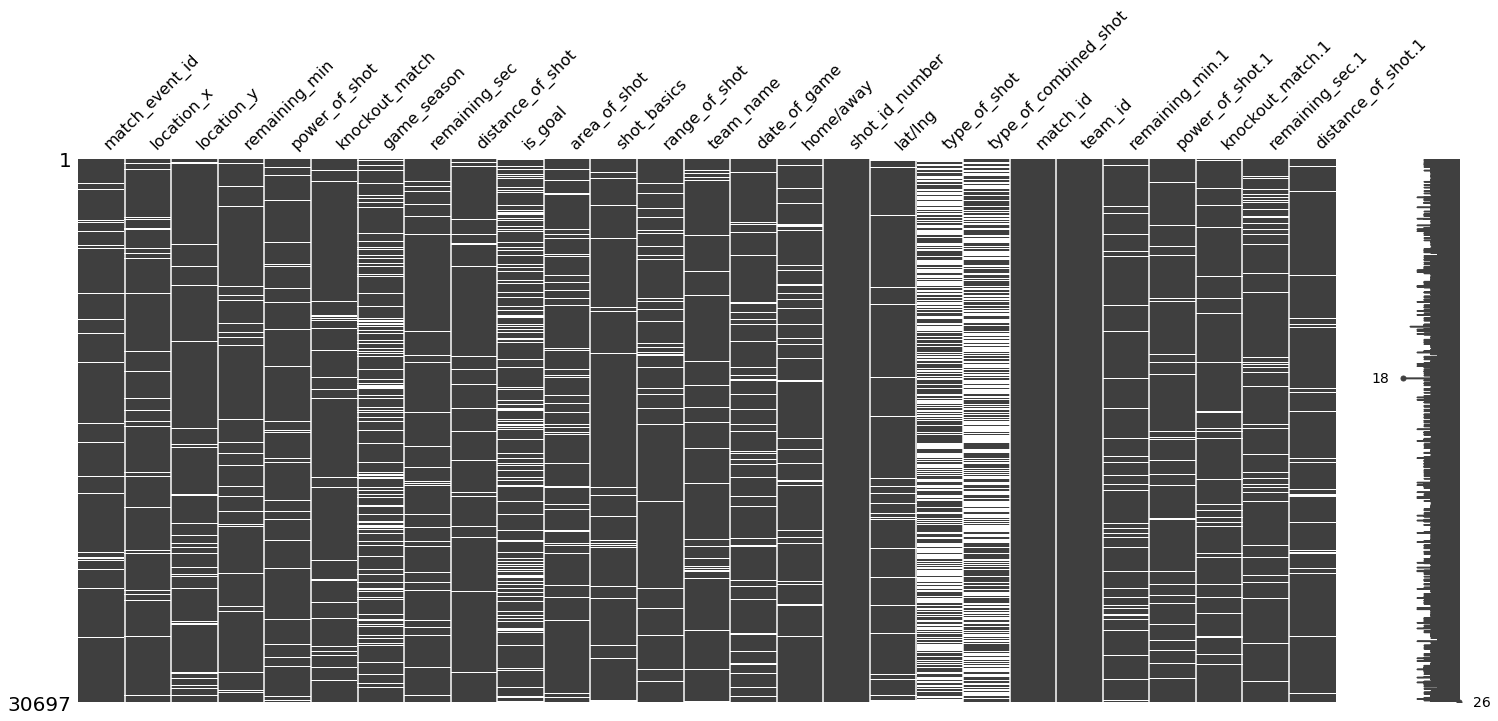

In [7]:
msno.matrix(data)

In [8]:
# Identifying the unique number of values in the dataset
data.nunique()

match_event_id             618
location_x                 488
location_y                 450
remaining_min               12
power_of_shot                7
knockout_match               2
game_season                 20
remaining_sec               60
distance_of_shot            73
is_goal                      2
area_of_shot                 6
shot_basics                  7
range_of_shot                5
team_name                    1
date_of_game              1558
home/away                   74
shot_id_number           30697
lat/lng                     38
type_of_shot                57
type_of_combined_shot        6
match_id                  1559
team_id                      1
remaining_min.1            291
power_of_shot.1            206
knockout_match.1           382
remaining_sec.1            354
distance_of_shot.1         271
dtype: int64

In [9]:
# Imputing missing values

In [10]:
data['match_event_id'] = data['match_event_id'].fillna(data['match_event_id'].mean())
data['location_x'] = data['location_x'].fillna(data['location_x'].mean())
data['location_y'] = data['location_y'].fillna(data['location_y'].mean())
data['remaining_min'] = data['remaining_min'].fillna(data['remaining_min'].mean())
data['power_of_shot'] = data['power_of_shot'].fillna(data['power_of_shot'].mean())
data['knockout_match'] = data['knockout_match'].fillna(-1)
data['game_season'] = data['game_season'].fillna('Unspecified')
data['remaining_sec'] = data['remaining_sec'].fillna(data['remaining_sec'].median())
data['distance_of_shot'] = data['distance_of_shot'].fillna(data['distance_of_shot'].mean())
data['area_of_shot'] = data['area_of_shot'].fillna('Unspecified')
data['shot_basics'] = data['shot_basics'].fillna('Unspecified')
data['range_of_shot'] = data['range_of_shot'].fillna('Unspecified')
data['home/away'] = data['home/away'].fillna('Unspecified')
data['type_of_shot'] = data['type_of_shot'].fillna('Unspecified')
data['remaining_min.1'] = data['remaining_min.1'].fillna(data['remaining_min.1'].median())
data['power_of_shot.1'] = data['power_of_shot.1'].fillna(data['power_of_shot.1'].median())
data['knockout_match.1'] = data['knockout_match.1'].fillna(-1)
data['remaining_sec.1'] = data['remaining_sec.1'].fillna(data['remaining_sec.1'].median())
data['distance_of_shot.1'] = data['distance_of_shot.1'].fillna(data['distance_of_shot.1'].mean())

In [11]:
l = []
for item in data['home/away']:
    if '@' in item:
        l.append('Away')
    elif 'vs' in item:
        l.append('Home')
    else:
        l.append('Unspecified')
data['h/a'] = l

In [12]:
def getlat(x):
    return float(str(x).split(',')[0])

In [13]:
def getlong(x):
    try:
        r = str(x).split(',')[1]
        return float(r)
    except:
        return np.nan

In [14]:
data['lat'] = data['lat/lng'].apply(getlat)

In [15]:
data['long'] = data['lat/lng'].apply(getlong)

In [16]:
data['lat'] = data['lat'].fillna(data['lat'].mean())
data['long'] = data['long'].fillna(data['long'].mean())

In [17]:
data.head()

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1,h/a,lat,long
0,10.0,167.0,72.0,10.000000,1.0,0.0,2000-01,27.0,38.0,NaN,Right Side(R),Mid Range,16-24 ft.,Manchester United,10/31/2000,MANU @ POR,1,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0,Away,45.539131,-122.651648
1,12.0,-157.0,0.0,10.000000,1.0,0.0,2000-01,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,Manchester United,10/31/2000,MANU @ POR,2,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0,Away,45.539131,-122.651648
2,35.0,-101.0,135.0,7.000000,1.0,0.0,2000-01,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,Manchester United,10/31/2000,Unspecified,3,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4,Unspecified,45.539131,-122.651648
3,43.0,138.0,175.0,6.000000,1.0,0.0,2000-01,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,Manchester United,10/31/2000,MANU @ POR,4,"45.539131, -122.651648",Unspecified,shot - 3,20000012,1610612747,6.00,1.0,122.608,52.0000,42.0,Away,45.539131,-122.651648
4,155.0,0.0,0.0,4.883233,2.0,0.0,2000-01,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,NaN,10/31/2000,MANU @ POR,5,"45.539131, -122.651648",Unspecified,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0,Away,45.539131,-122.651648


In [18]:
# Dropping columns not needed for our model
data.drop(['match_event_id', 'lat/lng', 'team_name', 'home/away', 'team_id', 'date_of_game', 'match_id', 'type_of_combined_shot'], axis=1, inplace=True)

In [19]:
data.dtypes

location_x            float64
location_y            float64
remaining_min         float64
power_of_shot         float64
knockout_match        float64
game_season            object
remaining_sec         float64
distance_of_shot      float64
is_goal               float64
area_of_shot           object
shot_basics            object
range_of_shot          object
shot_id_number          int64
type_of_shot           object
remaining_min.1       float64
power_of_shot.1       float64
knockout_match.1      float64
remaining_sec.1       float64
distance_of_shot.1    float64
h/a                    object
lat                   float64
long                  float64
dtype: object

In [20]:
data.isna().sum()

location_x               0
location_y               0
remaining_min            0
power_of_shot            0
knockout_match           0
game_season              0
remaining_sec            0
distance_of_shot         0
is_goal               6268
area_of_shot             0
shot_basics              0
range_of_shot            0
shot_id_number           0
type_of_shot             0
remaining_min.1          0
power_of_shot.1          0
knockout_match.1         0
remaining_sec.1          0
distance_of_shot.1       0
h/a                      0
lat                      0
long                     0
dtype: int64

In [21]:
train = data[data['is_goal'].notna()]

In [22]:
train.drop(['shot_id_number'], axis=1, inplace=True)

F:\Installed\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [23]:
train.shape

(24429, 21)

In [24]:
train.head()

,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,type_of_shot,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1,h/a,lat,long
1,-157.0,0.0,10.000000,1.0,0.0,2000-01,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,shot - 45,10.00,1.0,28.800,22.0000,35.0,Away,45.539131,-122.651648
2,-101.0,135.0,7.000000,1.0,0.0,2000-01,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,shot - 25,92.64,1.0,0.000,63.7216,54.4,Unspecified,45.539131,-122.651648
3,138.0,175.0,6.000000,1.0,0.0,2000-01,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,Unspecified,6.00,1.0,122.608,52.0000,42.0,Away,45.539131,-122.651648
4,0.0,0.0,4.883233,2.0,0.0,2000-01,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,Unspecified,42.64,2.0,0.000,19.0000,20.0,Away,45.539131,-122.651648
5,-145.0,-11.0,9.000000,3.0,0.0,Unspecified,32.0,34.0,0.0,Left Side(L),Mid Range,8-16 ft.,shot - 17,9.00,3.0,0.000,35.0000,34.0,Away,45.539131,-122.651648


In [25]:
test = data[data['is_goal'].isna()]

In [26]:
my_submission = pd.DataFrame({'shot_id_number': test['shot_id_number']})
my_submission.shape

(6268, 1)

In [27]:
test.drop(['shot_id_number'], axis=1, inplace=True)

In [28]:
test.shape

(6268, 21)

In [29]:
test.head()

,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,type_of_shot,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1,h/a,lat,long
0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,Right Side(R),Mid Range,16-24 ft.,shot - 30,10.00,1.00,50.608,54.2,38.0,Away,45.539131,-122.651648
7,1.0,28.0,8.0,3.0,0.0,2000-01,5.0,22.0,NaN,Center(C),Goal Area,Less Than 8 ft.,Unspecified,68.64,3.00,0.000,5.0,22.0,Away,45.539131,-122.651648
16,0.0,0.0,0.0,1.0,0.0,2000-01,1.0,20.0,NaN,Unspecified,Goal Area,Less Than 8 ft.,Unspecified,0.00,1.00,0.000,1.0,20.0,Home,42.982923,-71.446094
19,0.0,0.0,10.0,3.0,0.0,Unspecified,46.0,20.0,NaN,Center(C),Unspecified,Less Than 8 ft.,shot - 4,10.00,70.36,0.000,46.0,20.0,Home,42.982923,-71.446094
21,134.0,127.0,9.0,3.0,0.0,Unspecified,4.0,38.0,NaN,Right Side Center(RC),Mid Range,16-24 ft.,shot - 24,9.00,43.36,0.000,4.0,38.0,Home,42.982923,-71.446094


In [30]:
corr = data.corr()

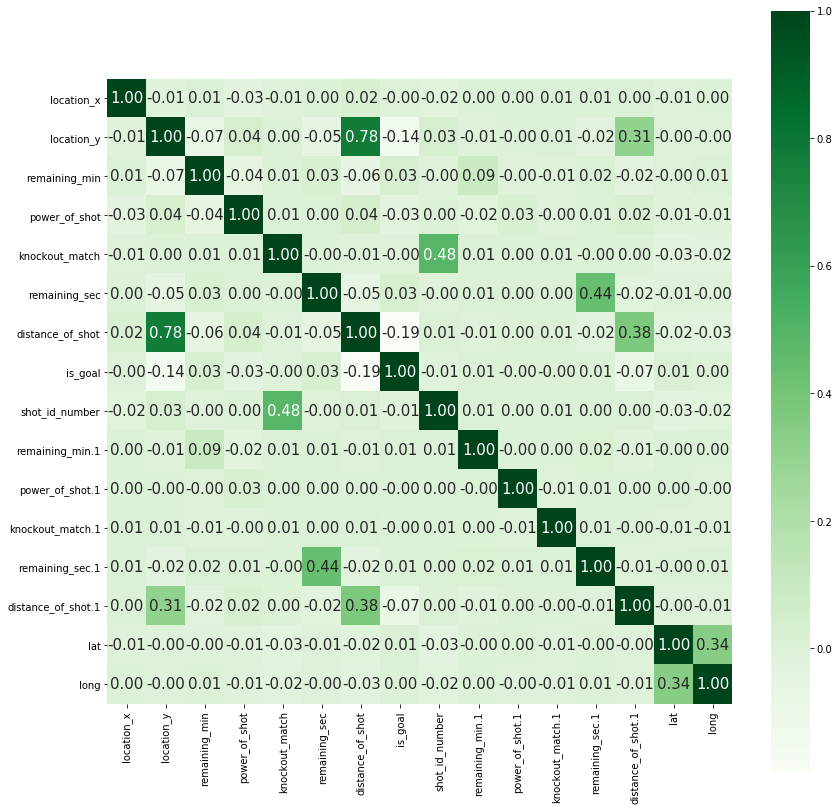

In [31]:
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=True, square= True, fmt='.2f',annot=True,annot_kws={'size':15}, cmap='Greens')

In [32]:
final_data = pd.get_dummies(train)

#### Once the data is cleaned, we split the data into training set and test set to prepare it for our machine learning model in a suitable proportion.

In [33]:
# Spliting target variable and independent variables
X = final_data.drop(['is_goal'], axis = 1)
y = final_data['is_goal']

In [34]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0, stratify=y)

### Logistic Regression

In [35]:
# Logistic Regression

# Import library for LogisticRegression
from sklearn.linear_model import LogisticRegression

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets 
logreg.fit(X_train, y_train)

F:\Installed\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
# Prediction on test data
y_pred = logreg.predict(X_test)

In [37]:
# Calculating the accuracy, precision and the recall
acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_logreg )
print( 'Precision : ', round( metrics.precision_score(y_test, y_pred) * 100, 2 ) )
print( 'Recall : ', round( metrics.recall_score(y_test, y_pred) * 100, 2 ) )

Total Accuracy :  63.9
Precision :  65.13
Recall :  40.75


In [38]:
# Create confusion matrix function to find out sensitivity and specificity
from sklearn.metrics import confusion_matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted, [1,0]).T
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

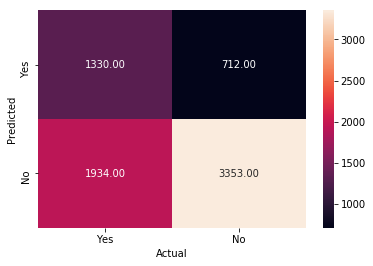

In [39]:
# Confusion matrix 
draw_cm(y_test, y_pred)

### Gaussian Naive Bayes

In [40]:
# Gaussian Naive Bayes

# Import library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
# Prediction on test set
y_pred = model.predict(X_test)

In [42]:
# Calculating the accuracy, precision and the recall
acc_nb = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_nb )
print( 'Precision : ', round( metrics.precision_score(y_test, y_pred) * 100, 2 ) )
print( 'Recall : ', round( metrics.recall_score(y_test, y_pred) * 100, 2 ) )

Total Accuracy :  50.99
Precision :  47.2
Recall :  84.8


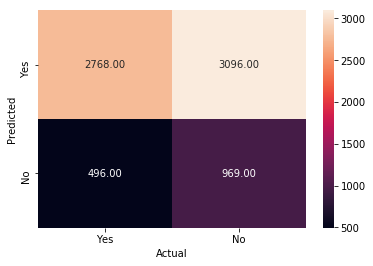

In [43]:
# Confusion matrix 
draw_cm(y_test, y_pred)

### Decision Tree Classifier

In [44]:
# Decision Tree Classifier

# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf = DecisionTreeClassifier()

# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

# Run the grid search
grid_obj = GridSearchCV(clf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets 
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
# Prediction on training set
y_pred = clf.predict(X_train)

In [46]:
# Finding the variable with more importance
feature_importance = pd.DataFrame([X_train.columns, clf.tree_.compute_feature_importances()])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[1:10]

No handles with labels found to put in legend.


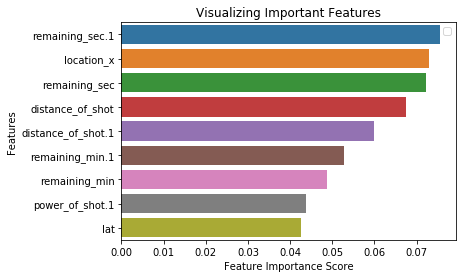

In [47]:
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [48]:
# Prediction on test set
y_pred = clf.predict(X_test)

In [49]:
# Calculating the accuracy, precision and the recall
acc_dt = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_dt )
print( 'Precision : ', round( metrics.precision_score(y_test, y_pred) * 100, 2 ) )
print( 'Recall : ', round( metrics.recall_score(y_test, y_pred) * 100, 2 ) )

Total Accuracy :  55.81
Precision :  50.38
Recall :  50.25


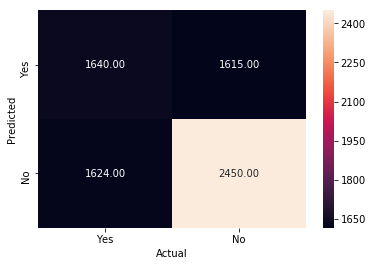

In [50]:
# Confusion matrix 
draw_cm(y_test, y_pred)

### Random Forest Classifier

In [51]:
# Random Forest Classifier

# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Run the grid search
grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_
# Train the model using the training sets 
rf.fit(X_train,y_train)

F:\Installed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

No handles with labels found to put in legend.


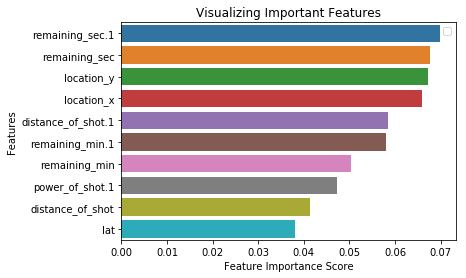

In [52]:
# Finding the variable with more importance
feature_imp = pd.Series(rf.feature_importances_,index= X_train.columns).sort_values(ascending=False)
# Creating a bar plot
feature_imp=feature_imp[0:10,]
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [53]:
# Prediction on test data
y_pred = rf.predict(X_test)

In [54]:
# Calculating the accuracy, precision and the recall
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Total Accuracy : ', acc_rf )
print( 'Precision : ', round( metrics.precision_score(y_test, y_pred) * 100 , 2 ) )
print( 'Recall : ', round( metrics.recall_score(y_test, y_pred) * 100, 2 ) )

Total Accuracy :  59.54
Precision :  57.04
Recall :  37.13


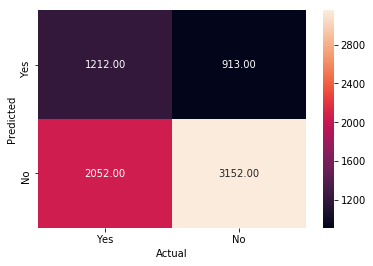

In [55]:
# Confusion matrix 
draw_cm(y_test, y_pred)

### Support Vector Machine Classifier

In [56]:
# SVM Classifier

# Creating scaled set to be used in model to improve the results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

F:\Installed\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
F:\Installed\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
F:\Installed\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  import sys


In [57]:
# Import Library of Support Vector Machine model
from sklearn import svm

# Create a Support Vector Classifier
svc = svm.SVC()

Hyperparameter Optimization
parameters = [
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['linear']}
]

# Run the grid search
grid_obj = GridSearchCV(svc, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_

# Train the model using the training sets 
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [58]:
# Prediction on test data
y_pred = svc.predict(X_test)

In [59]:
# Calculating the accuracy, precision and the recall
acc_svm = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_svm )
print( 'Precision : ', round( metrics.precision_score(y_test, y_pred) * 100, 2 ) )
print( 'Recall : ', round( metrics.recall_score(y_test, y_pred) * 100, 2 ) )

Total Accuracy :  63.83
Precision :  65.66
Recall :  39.37


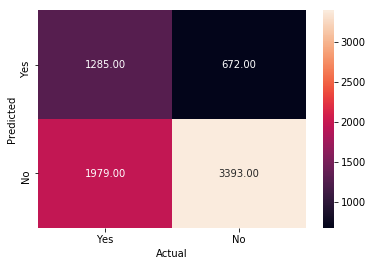

In [60]:
# Confusion matrix 
draw_cm(y_test, y_pred)

### eXtreme Gradient Boosting

In [61]:
# eXtreme Gradient Boosting

# Import library of xgboost model
from xgboost import XGBClassifier

# Create a XGB Classifier
gbm = XGBClassifier(learning_rate = 0.02, n_estimators= 2000, max_depth= 4, min_child_weight= 2, gamma=1, subsample=0.8, 
                    colsample_bytree=0.8, objective= 'binary:logistic', nthread= -1, scale_pos_weight=1)

# Train the model using the training sets 
gbm.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=1, learning_rate=0.02, max_delta_step=0,
       max_depth=4, min_child_weight=2, missing=None, n_estimators=2000,
       n_jobs=1, nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [62]:
# Prediction on test data
y_pred = gbm.predict(X_test)

In [63]:
# Calculating the accuracy, precision and the recall
acc_xgb = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Total Accuracy : ', acc_xgb )
print( 'Precision : ', round( metrics.precision_score(y_test, y_pred) * 100 , 2 ) )
print( 'Recall : ', round( metrics.recall_score(y_test, y_pred) * 100, 2 ) )

Total Accuracy :  62.97
Precision :  62.61
Recall :  41.82


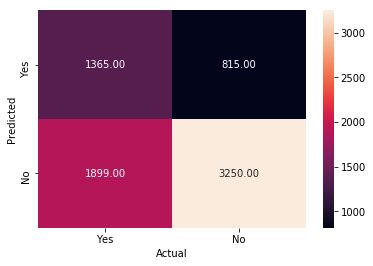

In [64]:
# Confusion matrix 
draw_cm(y_test, y_pred)

### Evaluation and comparision of all the models

In [65]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 'XGBoost'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,63.90
4,Support Vector Machines,63.83
5,XGBoost,62.97
3,Random Forest,59.54
2,Decision Tree,55.81
1,Naive Bayes,50.99


In [66]:
test_data = pd.get_dummies(test)

In [67]:
test_data.drop(['is_goal'], axis=1, inplace=True)

In [68]:
my_pred = logreg.predict(test_data)

In [69]:
my_pred.shape

(6268,)

In [70]:
my_submission['is_goal'] = my_pred

In [71]:
my_submission.head()

,shot_id_number,is_goal
0,1,0.0
7,8,1.0
16,17,1.0
19,20,1.0
21,22,0.0


In [72]:
my_submission.shape

(6268, 2)

In [74]:
# Saving predictions to the csv file
my_submission.to_csv('shreayan_chaudhary_060298_prediction_1.csv', index=False)
print ("File submitted successfully")

File submitted successfully
